In [1]:
!pip install pystan
!pip install fbprophet
!pip install prophet

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 4.6 MB/s 
     |████████████████████████████████| 214 kB 42.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640067 sha256=452da7f24b304febd1b7b94482ec07cdc19244cf529feb8b17b36a8deafbeb15
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('MoneyManager.csv')

In [4]:
def timestamp(x):
    return datetime.strptime(x, "%d-%m-%Y")

In [5]:
from datetime import datetime, timedelta,date
df['Date'] = df['Date'].apply(timestamp)
df

,Sr No.,Date,Amount,Description,Category
0,1,2021-07-01,100000,Salary,Income
1,2,2021-07-02,-2200,Party to friends,Social Life
2,3,2021-07-03,-560,Sapiens(book),Self Development
3,4,2021-07-04,-10600,Facewash and other hair produts,Beauty
4,5,2021-07-05,-2040,household items,household
...,...,...,...,...,...
149,150,2021-12-27,-415,new utensils,Household
150,151,2021-12-28,-598,yoga,Self Development
151,152,2021-12-29,-40,chocolate,Food
152,153,2021-12-30,-50,pen,Other


In [6]:
df=df.drop(['Category', 'Description', 'Sr No.'], axis=1)
df.columns = ['ds', 'y']
df

,ds,y
0,2021-07-01,100000
1,2021-07-02,-2200
2,2021-07-03,-560
3,2021-07-04,-10600
4,2021-07-05,-2040
...,...,...
149,2021-12-27,-415
150,2021-12-28,-598
151,2021-12-29,-40
152,2021-12-30,-50


In [7]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

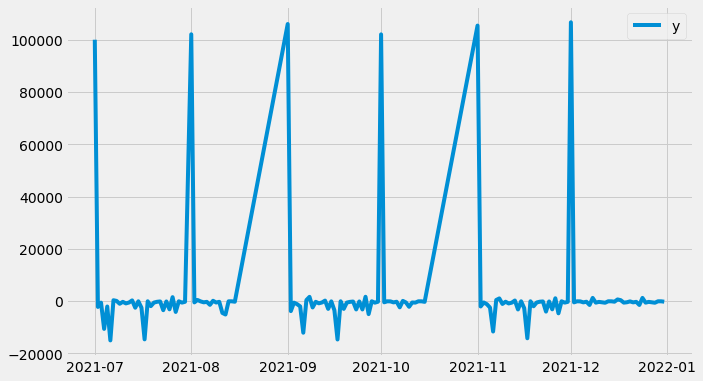

In [8]:

plt.figure(figsize=(10,6))
plt.plot(df.set_index('ds'))
plt.legend(['y'])

In [9]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
import numpy as np
#data=df['y']
mean = df['y'].mean(axis=0)
df['y'] -= mean
std = df['y'].std(axis=0)
df['y'] /= std
#df = df['y'].values
#df = df.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
#df_l = scaler.fit_transform(data)
df.head()

,ds,y
0,2021-07-01,4.719584
1,2021-07-02,-0.239400
2,2021-07-03,-0.159824
3,2021-07-04,-0.646988
4,2021-07-05,-0.231637


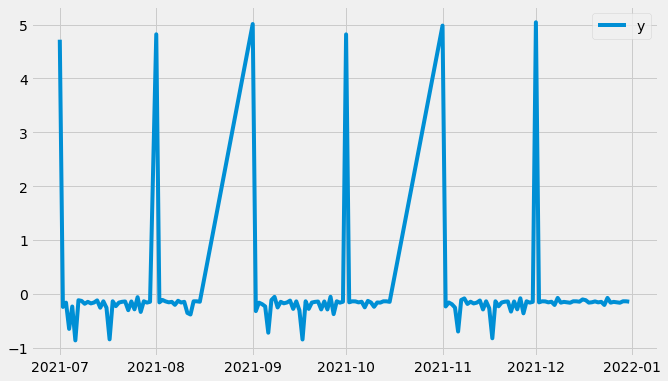

In [10]:
import numpy as np
#df['y'] = np.log(df['y'])
plt.figure(figsize=(10,6))
plt.plot(df.set_index('ds'))
plt.legend(['y'])

In [13]:
from fbprophet import Prophet
m=Prophet(daily_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [14]:
m.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [15]:
future_dates = m.make_future_dataframe(periods=31)

In [16]:
future_dates

,ds
0,2021-07-01
1,2021-07-02
2,2021-07-03
3,2021-07-04
4,2021-07-05
...,...
177,2022-01-27
178,2022-01-28
179,2022-01-29
180,2022-01-30


In [17]:
prediction = m.predict(future_dates)
prediction.tail().T

,177,178,179,180,181
ds,2022-01-27 00:00:00,2022-01-28 00:00:00,2022-01-29 00:00:00,2022-01-30 00:00:00,2022-01-31 00:00:00
trend,3.58354,3.58259,3.58163,3.58068,3.57972
yhat_lower,-1.39347,-1.36126,-1.62794,-1.44482,-1.38889
yhat_upper,1.09925,1.18652,0.890446,1.22862,1.26729
trend_lower,3.58348,3.58252,3.58157,3.58061,3.57965
trend_upper,3.5836,3.58265,3.5817,3.58075,3.5798
additive_terms,-3.68166,-3.67242,-3.92391,-3.65418,-3.64615
additive_terms_lower,-3.68166,-3.67242,-3.92391,-3.65418,-3.64615
additive_terms_upper,-3.68166,-3.67242,-3.92391,-3.65418,-3.64615
daily,-3.69826,-3.69826,-3.69826,-3.69826,-3.69826


In [18]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
177,2022-01-27,-0.098121,-1.393468,1.099254
178,2022-01-28,-0.089832,-1.361259,1.186521
179,2022-01-29,-0.342278,-1.627938,0.890446
180,2022-01-30,-0.073505,-1.444816,1.228621
181,2022-01-31,-0.066431,-1.388893,1.267290


In [19]:
np.exp(prediction[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
177,0.906539,0.248213,3.001924
178,0.914085,0.256338,3.275664
179,0.710151,0.196334,2.436215
180,0.929132,0.235790,3.416514
181,0.935727,0.249351,3.551217


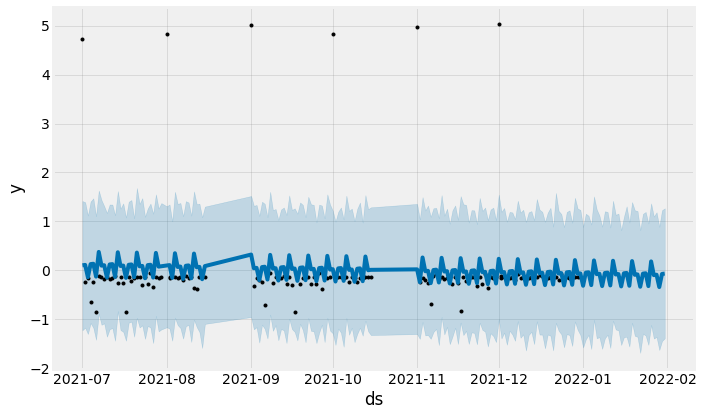

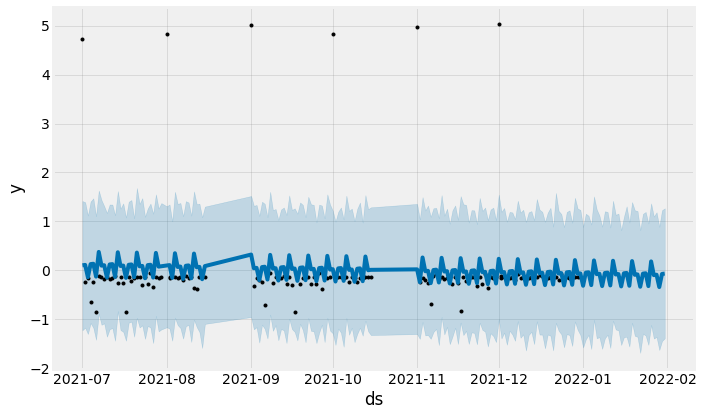

In [20]:
m.plot(prediction)

In [21]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='123 days', period ='13 days', horizon='31 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-11-04 00:00:00 and 2021-11-30 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-11-05,0.272639,-1.184313,1.611902,-0.251337,2021-11-04
1,2021-11-06,-0.079510,-1.531764,1.266488,-0.695511,2021-11-04
2,2021-11-07,0.318588,-1.146760,1.802299,-0.110574,2021-11-04
3,2021-11-08,0.296613,-1.227776,1.627742,-0.081509,2021-11-04
4,2021-11-09,-0.089668,-1.554410,1.256114,-0.184085,2021-11-04
